# Import data
Using: utf8 and latin-1

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

data_path = "../input/"
df = pd.read_csv(data_path+"Chemical_Toxicities_Blended_Flattened_Boolean.csv", encoding='latin-1')
df.head()

Chemical_Toxicities_Blended_Flattened_Boolean.csv
Chemical_Toxicities_Blended_Flattened_Numeric.csv
Chemical_Toxicities_Blended_Grouped.csv
Chemical_Toxicities_Blended_Sorted.csv



,tox_cas_edf_id,tox_chemical_name,tox_category,tox_cancer,tox_cardiovascular_blood,tox_developmental,tox_endocrine,tox_gastrointestinal_liver,tox_immunotoxicity,tox_kidney,tox_musculoskeletal,tox_neurotoxicity,tox_reproductive,tox_respiratory,tox_skin_sense
0,100-00-5,P-NITROCHLOROBENZENE,recognized,True,False,False,False,False,False,False,False,False,False,False,False
1,100-00-5,P-NITROCHLOROBENZENE,suspected,False,True,False,False,True,False,True,False,False,False,False,False
2,100-01-6,P-NITROANILINE,suspected,False,True,False,False,False,False,False,False,True,False,False,False
3,100-02-7,4-NITROPHENOL,suspected,False,True,False,False,False,False,False,False,True,False,False,True
4,100-20-9,"1,4-BENZENEDICARBONYL CHLORIDE",suspected,False,False,False,False,False,False,False,False,True,False,True,False


# Feature Design

In [2]:
# check for benzene ring
def benz(chem):
    if 'ben' in chem.lower():
        return(True)
    else:
        return(False)

# check for phenol
def phen(chem1):
    if 'phen' in chem1.lower():
        return(True)
    else:
        return(False)
    
# check for nitro
def nitr(chem2):
    if 'nitro' in chem2.lower():
        return(True)
    else:
        return(False)

# check for cyclohexene
def cycl(chem3):
    if 'cyclohexene' in chem3.lower():
        return(True)
    else:
        return(False)

# check for chlorine
def chl(chem4):
    if 'chlor' in chem4.lower():
        return(True)
    else:
        return(False)
    
# check for HYDRAZINE
def hyd(chem5):
    if 'hydrazine' in chem5.lower():
        return(True)
    else:
        return(False)
    
# check for nickel
def nic(chem6):
    if 'nickel'in chem6.lower():
        return(True)
    else:
        return(False)
    
# check for PIPERIDINE
def pip(chem7):
    if 'piperidine'in chem7.lower():
        return(True)
    else:
        return(False)
    
# check for chromium
def chro(chem8):
    if 'chrom' in chem8.lower():
        return(True)
    else:
        return(False)
    
# check for cadmium
def cad(chem9):
    if 'cadm' in chem9.lower():
        return(True)
    else:
        return(False)
    
# check for bromine
def bro(chem11):
    if 'bromo' in chem11.lower():
        return(True)
    else:
        return(False)
        

#apply
df['Benzene'] = df['tox_chemical_name'].apply(benz)
df['Phenol'] = df['tox_chemical_name'].apply(phen)
df['Nitro'] = df['tox_chemical_name'].apply(nitr)
df['Cyclohexene'] = df['tox_chemical_name'].apply(cycl)
df['Chlorine'] = df['tox_chemical_name'].apply(chl)
df['Hydrazine'] = df['tox_chemical_name'].apply(hyd)
df['Nickel'] = df['tox_chemical_name'].apply(nic)
df['Piperidine'] = df['tox_chemical_name'].apply(pip)
df['Chromium'] = df['tox_chemical_name'].apply(chro)
df['Cadmium'] = df['tox_chemical_name'].apply(cad)
df['Bromine'] = df['tox_chemical_name'].apply(bro)


# Correlations

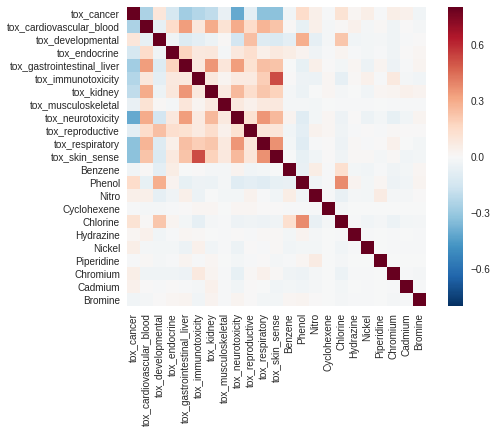

In [3]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

# Predict Suspect vs. Recognized  Using Random Forest
This Prediction is based on toxicology categories

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = df['tox_category']
X = df.drop(['tox_category','tox_chemical_name', 'tox_cas_edf_id'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



[[424   3]
 [ 53 720]]


             precision    recall  f1-score   support

 recognized       0.89      0.99      0.94       427
  suspected       1.00      0.93      0.96       773

avg / total       0.96      0.95      0.95      1200



# Feature Importance

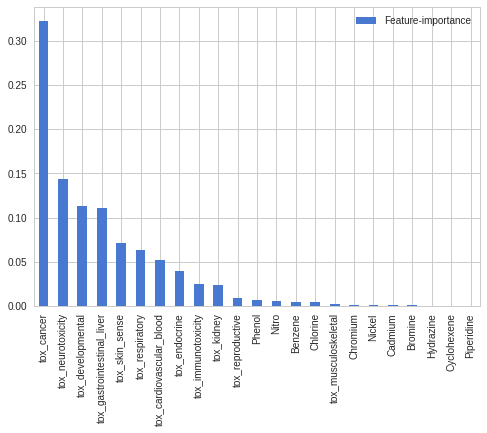

In [5]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.drop(['tox_category','tox_chemical_name', 'tox_cas_edf_id'],axis=1).columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature-importance'})
importances.sort_values(by='Feature-importance',ascending=False).plot(kind='bar', rot=90)